## still a draft
## maybe ok if correlation matrix has no nan
## coding style, try to follow rules

In [2]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## now autoreload py files

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"][0] = 12
#plt.rcParams["figure.figsize"][1] = 8

plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 6

## additional import

from sklearn.metrics import matthews_corrcoef
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
import gc
from tqdm import tqdm

# import necessaries
#project into 3-dim with pca
from mpl_toolkits import mplot3d
#import matplotlib.pyplot as plt
from sklearn import decomposition

### avoid import beyond top-level package

In [4]:
## self modules
#from pcaExpBase import plotlyScatter as plotSca
from pcaExpBase import Spectral_Clustering_Tool as scTool
from pcaExpBase import osPcaLaplacian as ospca
from pcaExpBase import pyod_my as pyod

In [5]:
#data = pd.read_table("aps_failure_training_set.csv", header=None)
## customer
data = pd.read_csv("APS_Failure/aps_failure_training_set.csv", skiprows=19)
data.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [6]:
## found string 'na'
## replace to Nan

dataTemp = data.replace(['na'], 
                        [np.nan])
dataTemp.head(10)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,NaN,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,NaN,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,NaN,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,NaN,0,NaN,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,NaN,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [7]:
## check missing
dataTemp.isnull().any().any()


True

data.isnull().sum().sum()

In [8]:
Dim = len(dataTemp.columns)
print(Dim)

171


In [9]:
# type to float

dataTemp2 = dataTemp
dataTemp2.iloc[:, 1:Dim] = dataTemp.iloc[:, 1:Dim].astype(np.float)
dataTemp2.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312.0,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14.0,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960.0,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204.0,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dataTemp2.describe()

## from informatin in Uci, features are anoymized QQ
## some categorical are conditions form bins

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [11]:
## fill with mean?
## exclude label
dataTemp3 = dataTemp2.copy()
# dimension variable Dim ready
dataTemp3.iloc[:,1:Dim] = dataTemp2.iloc[:,1:Dim].apply(lambda x: x.fillna(x.mean()),axis=0)
dataTemp3.isnull().any().any()

False

In [12]:
dataTemp3.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312.0,0.713189,2.130706e+09,218.000000,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14.0,0.000000,6.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960.0,0.713189,2.130706e+09,116.000000,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204.0,0.000000,1.820000e+02,190620.639314,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [13]:
## now load y label since need to drop 0th row

#y_temp = pd.read_csv('secom_labels.data.txt', sep=' ', header=None)
y_temp = dataTemp2.iloc[:, 0]


#y_temp = y_temp.drop([0,1])
y_temp.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

y_label = y_temp.iloc[:, 0]
y_label[ y_label == -1] = 0
y_label

In [14]:
y_temp.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [15]:
## deal with string
N = len(y_temp)
y_label = np.zeros(N)
y_label[y_temp=='pos'] = 1

# y_label ready

In [16]:
## drop label here seems better
## drop label
dataTemp31 = dataTemp3.drop(['class'], axis=1)
dataTemp31.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [17]:
## drop std == 0 
STD_DES = dataTemp3.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([89])

In [18]:
dataTemp31.columns[zeros]

Index(['cd_000'], dtype='object')

In [19]:
dataTemp31.describe().iloc[:,zeros]

,cd_000
count,60000.0
mean,1209600.0
std,0.0
min,1209600.0
25%,1209600.0
50%,1209600.0
75%,1209600.0
max,1209600.0


In [20]:
## drop
dataTemp4 = dataTemp31.drop(dataTemp31.columns[zeros], axis=1)
dataTemp4.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [21]:
## drop std == 0 
STD_DES = dataTemp4.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([], dtype=int64)

In [22]:
## random sample data since too large
## from train test split?



In [23]:
# ---------------- process --------------------

## import dataset

## recognize y_label
## X be dataFrame, y be series
## see if need reduce row with random sampling split

## deal with nan

## plotly to check distribution, see shape
### whole
## Laplacian, see best k from eigen gap(make function)
### clustered


In [24]:
## see whole first


In [25]:
## optional
pStr = 'APS'

In [26]:
dataX = dataTemp4
#dataX = dataTempScale01
y_current = y_label
# y_label ready

## detect

In [27]:
currentData = dataX

# y_label need back to series
## also bring back index

X_index = dataX.index

y_Series = pd.Series(y_label, index=X_index)
y_Series = y_Series.rename('label')
y_Series.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

## set up Experiments

In [28]:
NTRAIL = 5
RANDOMPICK = False
UPDATE = False


In [29]:
SCALE=False

## parameter for abod and lof

In [30]:
## para for abod 
n_abod = 11
contami_abod = 0.12

# para for lof
n_lof = 15
contami_lof = 0.18


## parameter for Online PCA

In [31]:
ini_For_W = 1

sRateW = 0.4
#sRateW = sampArr[aucBestIdx[0]]
#betaW = 1/(sRateW*(norNum))

dropRateT_W = 0.2
#dropRateT_W = dropArr[aucBestIdx[1]]

## parameter for Multi-view PCA

In [32]:
MAX = 0
AVG = 1

In [33]:
k = 5

In [34]:
NOR_RAN = False

In [35]:
sRateClus = 0.1
#betaClus = 1/(sRateClus*(norNum))
ini_For_Clus = 1
## control fpr, maybe fpr lower than 0.1??
dropRateT_Clus = 0.03

In [36]:
thresLowBDD = 0.0001
#thresLowBDD = 0.0000001 # for noramlized random walk
thresUpBDD = 1
strategy = MAX



## One time experiment

In [37]:
X_nor, X_test, y_test = ospca.getTrainTest(currentData, y_Series, SCALE=SCALE)

In [38]:
betaClus = 1/(sRateClus*len(X_nor))

In [39]:
fineClus, tprClus, fprClus, aucClus, thresholdArr, scoreOneTable, feaNumArr = ospca.oneRandomTrailClus(X_nor, X_test, y_test,
                       sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                       k, thresLowBDD, strategy,
                       thresUpBDD=1,
                       UPDATE=UPDATE, NOR_RAN=NOR_RAN, Name=' ')

[array([  0,  11,  12,  13,  14,  16,  22,  23,  24,  25,  38,  39,  46,
        47,  52,  53,  54,  55,  56,  57,  58,  59,  62,  67,  68,  69,
        70,  80,  81,  82,  83,  84,  88,  93,  95, 101, 102, 103, 104,
       110, 112, 113, 114, 115, 116, 117, 118, 131, 141, 146, 147, 155,
       156, 157, 158, 159, 160, 161, 162]), array([  1,   2,   3,   4,   5,   6,   7,  15,  17,  18,  19,  28,  30,
        31,  37,  41,  42,  43,  44,  45,  50,  51,  66,  79,  85,  86,
        87,  90,  92,  94,  96, 108, 109, 120, 121, 122, 123, 126, 127,
       128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143,
       148, 149, 151, 152, 153, 154, 165, 166, 167, 168]), array([71, 72, 73, 74, 75, 76, 77, 78]), array([  8,   9,  10,  20,  21,  26,  27,  29,  40,  48,  49,  60,  61,
        63,  64,  65,  89,  91,  97,  98,  99, 100, 105, 106, 107, 111,
       119, 124, 125, 130, 144, 145, 150, 163, 164]), array([32, 33, 34, 35, 36])]


  7%|▋         | 2244/30500 [00:00<00:01, 22438.10it/s]

[3.57471630e-03 7.14575389e-06 9.09469076e-03 2.26397437e-07
 2.27999386e-09]
Fine Clusters:  [0 2]
Not update


100%|██████████| 30500/30500 [00:01<00:00, 21627.99it/s]

tpr:  0.913 , fpr:  0.08864406779661017


## Ntrail experiment, model: Online PCA, Multi-view PCA

tpr:  0.965 , fpr:  0.2502372881355932
Auc whole:  0.9566156949152542
----------------------------------
[array([  1,   2,   3,   4,   5,   8,  15,  17,  18,  19,  26,  27,  28,
        29,  30,  32,  33,  34,  35,  36,  37,  41,  44,  45,  50,  51,
        71,  72,  86,  87,  90,  92,  96,  98, 108, 109, 111, 119, 120,
       121, 122, 123, 126, 127, 128, 129, 133, 134, 137, 138, 144, 166,
       167, 168]), array([  0,  10,  11,  12,  13,  16,  22,  23,  24,  25,  38,  39,  46,
        47,  52,  53,  54,  55,  56,  57,  58,  59,  60,  62,  67,  68,
        69,  70,  80,  81,  82,  83,  84,  88,  93,  95, 101, 102, 103,
       104, 105, 110, 112, 113, 114, 115, 116, 117, 118, 131, 141, 146,
       147, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164]), array([  9,  14,  20,  21,  31,  40,  42,  43,  48,  49,  61,  63,  64,
        65,  66,  73,  74,  75,  76,  77,  78,  79,  85,  89,  91,  97,
        99, 100, 106, 107, 124, 125, 130, 132, 136, 142, 143, 145, 148,
       149, 150, 15

  7%|▋         | 2168/30500 [00:00<00:01, 21675.32it/s]

[1.30635219e-07 3.58839792e-03 3.12647817e-04 1.80110738e-07
 2.67258438e-11]
Fine Clusters:  [1 2]
Not update


100%|██████████| 30500/30500 [00:01<00:00, 21285.99it/s]


tpr:  0.965 , fpr:  0.126135593220339
Auc clusters:  0.9623408813559322


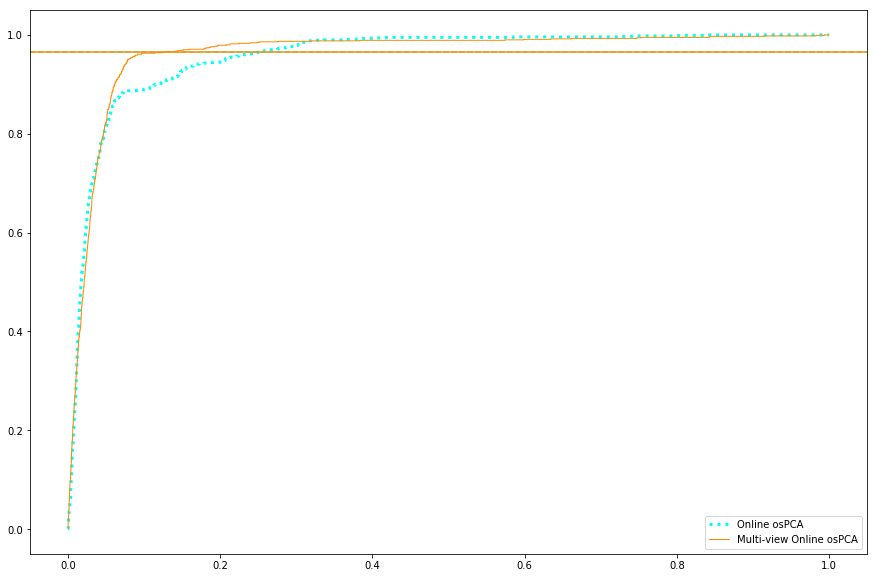

tpr:  0.967 , fpr:  0.2663728813559322
Auc whole:  0.9561523389830507
----------------------------------
[array([  1,   2,   3,   4,   5,   6,   7,  15,  18,  19,  32,  33,  34,
        35,  36,  41,  50,  51,  71,  72,  90,  92,  94,  96, 108, 109,
       120, 121, 122, 126, 128, 129, 133, 134, 135, 136, 137, 138, 152,
       153, 167, 168]), array([  0,  10,  11,  12,  13,  16,  22,  23,  24,  25,  38,  39,  40,
        46,  47,  52,  53,  54,  55,  56,  57,  58,  59,  62,  67,  68,
        69,  70,  80,  81,  82,  83,  84,  88,  93,  95, 100, 101, 102,
       103, 104, 105, 110, 112, 113, 114, 115, 116, 117, 118, 130, 131,
       141, 146, 147, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164]), array([ 27,  29, 111]), array([139, 140]), array([  8,   9,  14,  17,  20,  21,  26,  28,  30,  31,  37,  42,  43,
        44,  45,  48,  49,  60,  61,  63,  64,  65,  66,  73,  74,  75,
        76,  77,  78,  79,  85,  86,  87,  89,  91,  97,  98,  99, 106,
       107, 119, 123, 124, 125, 1

 12%|█▏        | 3689/30500 [00:00<00:00, 36881.15it/s]

[2.49371956e-09 4.67024392e-03 2.44404497e-12 3.60800279e-12
 1.46032783e-06]
Fine Clusters:  [1]
Not update


100%|██████████| 30500/30500 [00:00<00:00, 36573.45it/s]


tpr:  0.958 , fpr:  0.0779322033898305
Find intersection
[  1   2   3   4   5  15  18  19  32  33  34  35  36  41  50  51  71  72
  90  92  96 108 109 120 121 122 126 128 129 133 134 137 138 167 168]
[]
[ 27  29 111]
[]
[  8  17  26  28  30  37  44  45  86  87  98 119 123 127 144 166]
ComLen
[35.  0.  3.  0. 16.]
pick
[  1   2   3   4   5  15  18  19  32  33  34  35  36  41  50  51  71  72
  90  92  96 108 109 120 121 122 126 128 129 133 134 137 138 167 168]
------------------------
[]
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
[]
[]
[60]
ComLen
[ 0. 62.  0.  0.  1.]
pick
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 

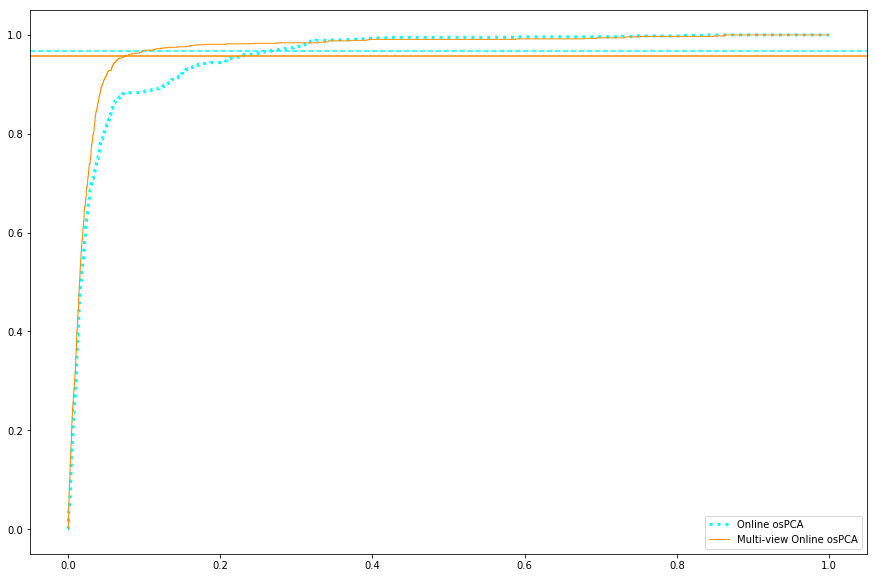

tpr:  0.967 , fpr:  0.2620677966101695
Auc whole:  0.9562919661016948
----------------------------------
[array([  0,   9,  10,  11,  12,  13,  16,  22,  23,  24,  25,  38,  39,
        40,  46,  47,  52,  53,  54,  55,  56,  57,  58,  59,  61,  62,
        67,  68,  69,  70,  80,  81,  82,  83,  84,  88,  93,  95,  99,
       100, 101, 102, 103, 104, 105, 110, 112, 113, 114, 115, 116, 117,
       118, 124, 130, 131, 141, 142, 143, 146, 147, 149, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164]), array([ 71,  72,  73,  74,  75,  76,  77,  78,  94, 135, 136, 139, 140]), array([  1,   2,   4,   5,   6,   7,   8,  14,  15,  17,  18,  19,  20,
        21,  26,  27,  28,  29,  30,  31,  37,  41,  42,  43,  44,  45,
        48,  49,  50,  51,  60,  63,  64,  65,  66,  79,  85,  86,  87,
        89,  91,  92,  96,  97,  98, 106, 107, 109, 111, 119, 120, 121,
       122, 123, 125, 126, 127, 128, 129, 132, 133, 134, 137, 138, 144,
       145, 148, 150, 151, 152, 153, 154, 165, 166, 167,

  7%|▋         | 2237/30500 [00:00<00:01, 22360.43it/s]

[4.68680973e-03 4.68014636e-04 8.18676974e-06 2.13402529e-09
 0.00000000e+00]
Fine Clusters:  [0 1]
Not update


100%|██████████| 30500/30500 [00:01<00:00, 21923.72it/s]


tpr:  0.973 , fpr:  0.15783050847457628
Find intersection
[]
[71 72]
[  1   2   4   5  15  18  19  41  50  51  92  96 109 120 121 122 126 128
 129 133 134 137 138 167 168]
[32 33 34 35 36]
[  3  90 108]
ComLen
[ 0.  2. 25.  5.  3.]
pick
[  1   2   4   5  15  18  19  41  50  51  92  96 109 120 121 122 126 128
 129 133 134 137 138 167 168]
------------------------
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
[]
[]
[]
[]
ComLen
[62.  0.  0.  0.  0.]
pick
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
------------------------
[  9  61  99 124 142 143 149]
[73 74 75 76 77 78]
[ 14  20

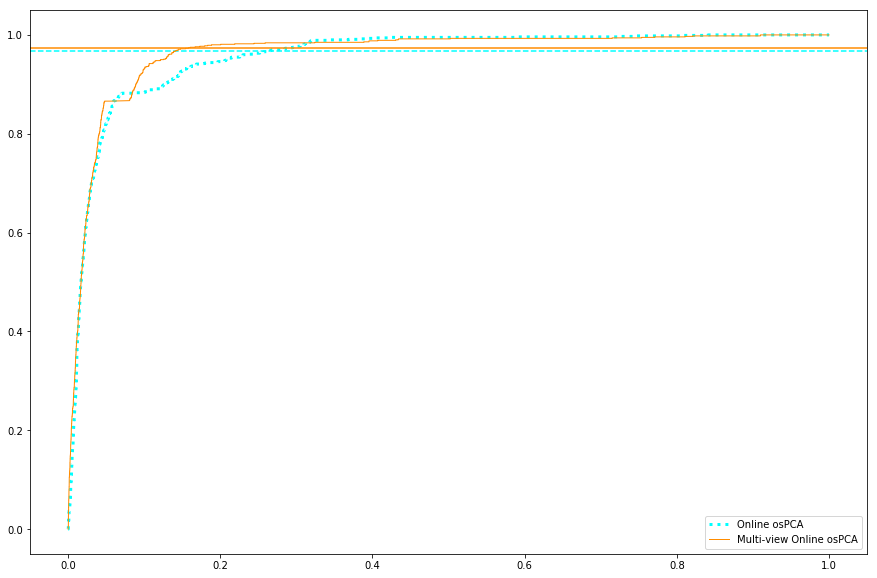

tpr:  0.969 , fpr:  0.26620338983050845
Auc whole:  0.9559806101694915
----------------------------------
[array([  0,   9,  10,  11,  12,  13,  14,  16,  22,  23,  24,  25,  38,
        39,  40,  46,  47,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  67,  68,  69,  70,  80,  81,  82,  83,  84,  88,  93,
        95,  99, 100, 101, 102, 103, 104, 105, 106, 110, 112, 113, 114,
       115, 116, 117, 118, 124, 130, 131, 141, 146, 147, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164]), array([32, 33, 34, 35, 36]), array([  1,   2,   3,   4,   5,   6,   7,   8,  15,  17,  18,  19,  20,
        21,  26,  27,  28,  29,  30,  31,  37,  41,  42,  43,  44,  45,
        48,  49,  50,  51,  63,  64,  65,  66,  79,  85,  86,  87,  89,
        90,  91,  92,  96,  97,  98, 107, 108, 109, 111, 119, 120, 121,
       122, 123, 125, 126, 127, 128, 129, 132, 133, 134, 136, 137, 138,
       142, 143, 144, 145, 148, 149, 150, 151, 152, 153, 154, 165, 166,
       167, 168]), array([71

  7%|▋         | 2191/30500 [00:00<00:01, 21899.27it/s]

[4.97098819e-03 2.95265123e-09 7.46318842e-06 9.34419052e-03
 5.95334047e-07]
Fine Clusters:  [0 3]
Not update


100%|██████████| 30500/30500 [00:01<00:00, 21829.42it/s]


tpr:  0.955 , fpr:  0.09691525423728814
Find intersection
[]
[]
[  1   2   4   5  15  18  19  41  50  51  92  96 109 120 121 122 126 128
 129 133 134 137 138 167 168]
[]
[]
ComLen
[ 0.  0. 25.  0.  0.]
pick
[  1   2   4   5  15  18  19  41  50  51  92  96 109 120 121 122 126 128
 129 133 134 137 138 167 168]
------------------------
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
[]
[]
[]
[]
ComLen
[62.  0.  0.  0.  0.]
pick
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
------------------------
[ 14 106]
[]
[ 20  21  31  42  43  48  49  63  64  65  66  79  85  89  91  97 107 125
 1

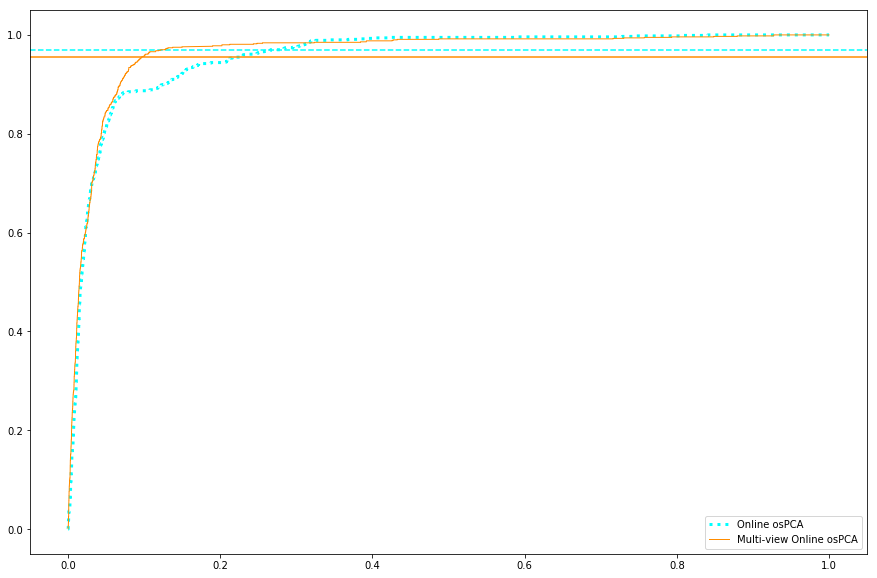

tpr:  0.969 , fpr:  0.2711864406779661
Auc whole:  0.9568378983050847
----------------------------------
[array([  4,   5,   8,   9,  20,  21,  26,  31,  48,  49,  61,  63,  64,
        65,  89,  91,  97,  99, 100, 106, 107, 124, 125, 132, 136, 144,
       145, 150, 151, 152, 153, 167, 168]), array([  0,  10,  11,  12,  13,  14,  16,  22,  23,  24,  25,  38,  39,
        40,  46,  47,  52,  53,  54,  55,  56,  57,  58,  59,  62,  67,
        68,  69,  70,  80,  81,  82,  83,  84,  88,  93,  95, 101, 102,
       103, 104, 105, 110, 112, 113, 114, 115, 116, 117, 118, 130, 131,
       141, 142, 143, 146, 147, 149, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164]), array([  1,   2,   3,   6,   7,  15,  17,  18,  19,  27,  28,  29,  30,
        32,  37,  41,  42,  43,  44,  45,  50,  51,  60,  66,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  85,  86,  87,  90,  92,  94,
        96,  98, 108, 109, 111, 119, 120, 121, 122, 123, 126, 127, 128,
       129, 133, 134, 135, 137, 13

 12%|█▏        | 3641/30500 [00:00<00:00, 36403.53it/s]

[9.59031196e-08 4.99313501e-03 6.98386664e-06 3.51008111e-12
 1.03131798e-08]
Fine Clusters:  [1]
Not update


100%|██████████| 30500/30500 [00:00<00:00, 36254.33it/s]


tpr:  0.958 , fpr:  0.07874576271186441
Find intersection
[  4   5 167 168]
[]
[  1   2  15  18  19  41  50  51  92  96 109 120 121 122 126 128 129 133
 134 137 138]
[]
[]
ComLen
[ 4.  0. 21.  0.  0.]
pick
[  1   2  15  18  19  41  50  51  92  96 109 120 121 122 126 128 129 133
 134 137 138]
------------------------
[]
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
[]
[]
[]
ComLen
[ 0. 62.  0.  0.  0.]
pick
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
------------------------
[ 20  21  31  48  49  63  64  65  89  91  97 107 125 132 145 150 151]
[]
[ 42  43  66  79  85 148 154 165

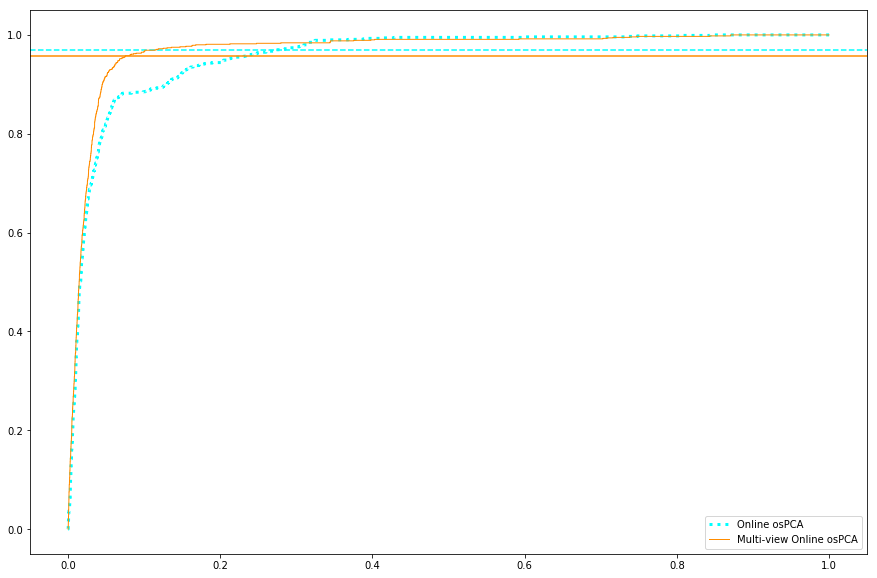

For whole dataset: 
Auc:  0.9563757016949153 +- 0.0003111984306984499
Tpr:  0.9673999999999999 +- 0.0014966629547095778
Fpr:  0.2632135593220339 +- 0.0071018817984390805
For Laplacian: 
Average threshold: 
[1.93160539e-03 2.74395889e-03 6.70563289e-05 1.86887456e-03
 4.13200357e-07]
threshold in order: 
[4.13200357e-07 6.70563289e-05 1.86887456e-03 1.93160539e-03
 2.74395889e-03]
Auc:  0.9660048237288136 +- 0.003366217362711285
Tpr:  0.9618 +- 0.006493073232299177
Fpr:  0.10751186440677966 +- 0.030638349548977345
Fine clusters: 
[array([1, 2]), array([1]), array([0, 1]), array([0, 3]), array([1])]
Common clusters: 
[  1   2  15  18  19  41  50  51  92  96 109 120 121 122 126 128 129 133
 134 137 138]
[  0  10  11  12  13  16  22  23  24  25  38  39  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 105 110 112 113 114 115 116 117 118 131 141 146 147 155 156
 157 158 159 160 161 162 163 164]
[ 20  21  31  48  49  63  64  65  89 

In [49]:
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                            UPDATE=UPDATE, NOR_RAN=NOR_RAN,
                            )

## NTrail experiment, model: Online PCA, Multi-view PCA, ABOD, LOF

tpr:  0.967 , fpr:  0.25854237288135595
Auc whole:  0.9568082711864406
----------------------------------
[array([ 71,  72,  73,  74,  75,  76,  77,  78,  94, 135, 136, 139, 140,
       152, 153, 168]), array([  0,   9,  10,  11,  12,  13,  16,  22,  23,  24,  25,  38,  39,
        40,  46,  47,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  67,  68,  69,  70,  80,  81,  82,  83,  84,  88,  89,  93,
        95, 100, 101, 102, 103, 104, 105, 110, 112, 113, 114, 115, 116,
       117, 118, 124, 130, 131, 141, 142, 143, 146, 147, 149, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164]), array([ 27,  29, 111]), array([32, 33, 34, 35, 36]), array([  1,   2,   3,   4,   5,   6,   7,   8,  14,  15,  17,  18,  19,
        20,  21,  26,  28,  30,  31,  37,  41,  42,  43,  44,  45,  48,
        49,  50,  51,  63,  64,  65,  66,  79,  85,  86,  87,  90,  91,
        92,  96,  97,  98,  99, 106, 107, 108, 109, 119, 120, 121, 122,
       123, 125, 126, 127, 128, 129, 132, 133, 

  7%|▋         | 2191/30500 [00:00<00:01, 21901.46it/s]

[2.39459133e-02 5.19146424e-03 3.76461085e-11 2.79242585e-09
 7.60403252e-06]
Fine Clusters:  [0 1]
Not update


100%|██████████| 30500/30500 [00:01<00:00, 20382.09it/s]


tpr:  0.895 , fpr:  0.08566101694915254
Auc clusters:  0.9620582542372881
Auc Lof:  0.7419284745762711
Auc Abod:  0.9787645084745763


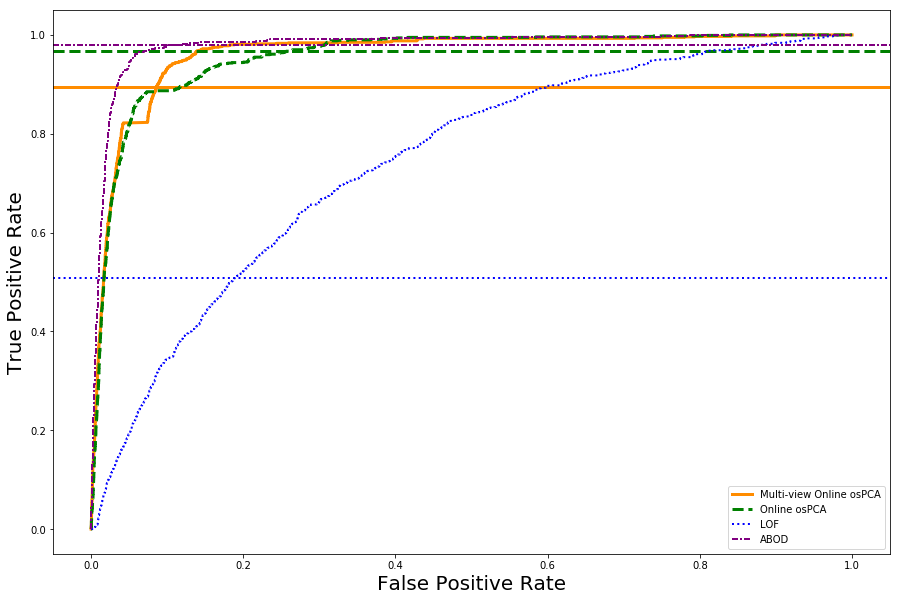

tpr:  0.967 , fpr:  0.29240677966101697
Auc whole:  0.9535386101694915
----------------------------------
[array([  8,   9,  10,  14,  20,  21,  27,  28,  29,  43,  48,  49,  60,
        61,  63,  64,  65,  89,  91,  97,  99, 100, 105, 106, 107, 111,
       123, 124, 125, 130, 145, 150, 151, 164]), array([71, 72, 73, 74, 75, 76, 77, 78]), array([  0,  11,  12,  13,  16,  22,  23,  24,  25,  38,  39,  40,  46,
        47,  52,  53,  54,  55,  56,  57,  58,  59,  62,  67,  68,  69,
        70,  80,  81,  82,  83,  84,  88,  93,  95, 101, 102, 103, 104,
       110, 112, 113, 114, 115, 116, 117, 118, 131, 141, 146, 147, 155,
       156, 157, 158, 159, 160, 161, 162, 163]), array([33, 34, 35, 36]), array([  1,   2,   3,   4,   5,   6,   7,  15,  17,  18,  19,  26,  30,
        31,  32,  37,  41,  42,  44,  45,  50,  51,  66,  79,  85,  86,
        87,  90,  92,  94,  96,  98, 108, 109, 119, 120, 121, 122, 126,
       127, 128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142,
       14

  4%|▎         | 1135/30500 [00:00<00:02, 11340.03it/s]

[9.15668978e-03 8.68580814e-03 3.58959223e-03 4.69102179e-09
 7.47404571e-06]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 30500/30500 [00:02<00:00, 14172.34it/s]


tpr:  0.955 , fpr:  0.12854237288135592
Find intersection
[]
[71 72 73 74 75 76 77 78]
[]
[]
[ 94 135 136 139 140 152 153 168]
ComLen
[0. 8. 0. 0. 8.]
pick
[71 72 73 74 75 76 77 78]
------------------------
[  9  10  60  61  89 100 105 124 130 164]
[]
[  0  11  12  13  16  22  23  24  25  38  39  40  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 110 112 113 114 115 116 117 118 131 141 146 147 155 156 157
 158 159 160 161 162 163]
[]
[142 143 149]
ComLen
[10.  0. 60.  0.  3.]
pick
[  0  11  12  13  16  22  23  24  25  38  39  40  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 110 112 113 114 115 116 117 118 131 141 146 147 155 156 157
 158 159 160 161 162 163]
------------------------
[ 27  29 111]
[]
[]
[]
[]
ComLen
[3. 0. 0. 0. 0.]
pick
[ 27  29 111]
------------------------
[]
[]
[]
[33 34 35 36]
[32]
ComLen
[0. 0. 0. 4. 1.]
pick
[33 34 35 36]
-----------------

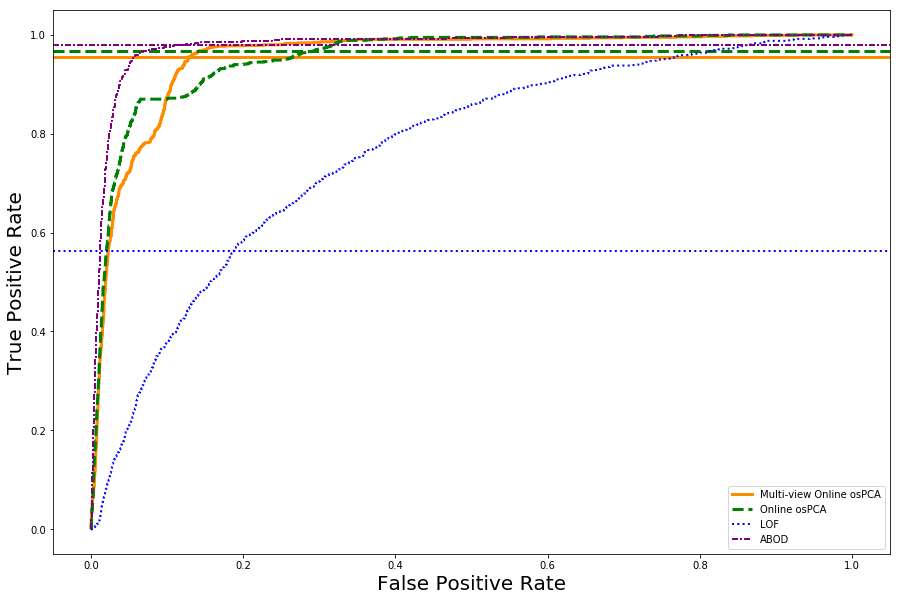

tpr:  0.972 , fpr:  0.28135593220338984
Auc whole:  0.9564962372881356
----------------------------------
[array([  1,   2,   3,   4,   5,   6,   7,  15,  17,  18,  19,  20,  21,
        26,  27,  28,  29,  30,  31,  37,  41,  42,  43,  44,  45,  48,
        49,  50,  51,  63,  64,  65,  66,  79,  85,  86,  87,  89,  90,
        91,  92,  96,  98, 107, 108, 109, 111, 120, 121, 122, 123, 125,
       126, 127, 128, 129, 132, 133, 134, 136, 137, 138, 142, 143, 144,
       145, 148, 149, 150, 151, 152, 153, 154, 165, 166, 167, 168]), array([  0,   8,   9,  10,  11,  12,  13,  14,  16,  22,  23,  24,  25,
        38,  39,  40,  46,  47,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  67,  68,  69,  70,  80,  81,  82,  83,  84,  88,
        93,  95,  97,  99, 100, 101, 102, 103, 104, 105, 106, 110, 112,
       113, 114, 115, 116, 117, 118, 119, 124, 130, 131, 141, 146, 147,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164]), array([ 94, 135, 139, 140]), array([71, 72, 7

  7%|▋         | 2227/30500 [00:00<00:01, 22259.73it/s]

[8.08817800e-06 4.87842751e-03 3.33012649e-08 8.24542038e-03
 1.35179223e-09]
Fine Clusters:  [1 3]
Not update


100%|██████████| 30500/30500 [00:01<00:00, 21397.17it/s]


tpr:  0.96 , fpr:  0.10433898305084746
Find intersection
[]
[]
[]
[71 72 73 74 75 76 77 78]
[]
ComLen
[0. 0. 0. 8. 0.]
pick
[71 72 73 74 75 76 77 78]
------------------------
[]
[  0  11  12  13  16  22  23  24  25  38  39  40  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 110 112 113 114 115 116 117 118 131 141 146 147 155 156 157
 158 159 160 161 162 163]
[]
[]
[]
ComLen
[ 0. 60.  0.  0.  0.]
pick
[  0  11  12  13  16  22  23  24  25  38  39  40  46  47  52  53  54  55
  56  57  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101
 102 103 104 110 112 113 114 115 116 117 118 131 141 146 147 155 156 157
 158 159 160 161 162 163]
------------------------
[ 27  29 111]
[]
[]
[]
[]
ComLen
[3. 0. 0. 0. 0.]
pick
[ 27  29 111]
------------------------
[]
[]
[]
[]
[33 34 35 36]
ComLen
[0. 0. 0. 0. 4.]
pick
[33 34 35 36]
------------------------
[  1   2   3   4   5   6   7  15  17  18  19  26  30  31  37  41  42  44
  4

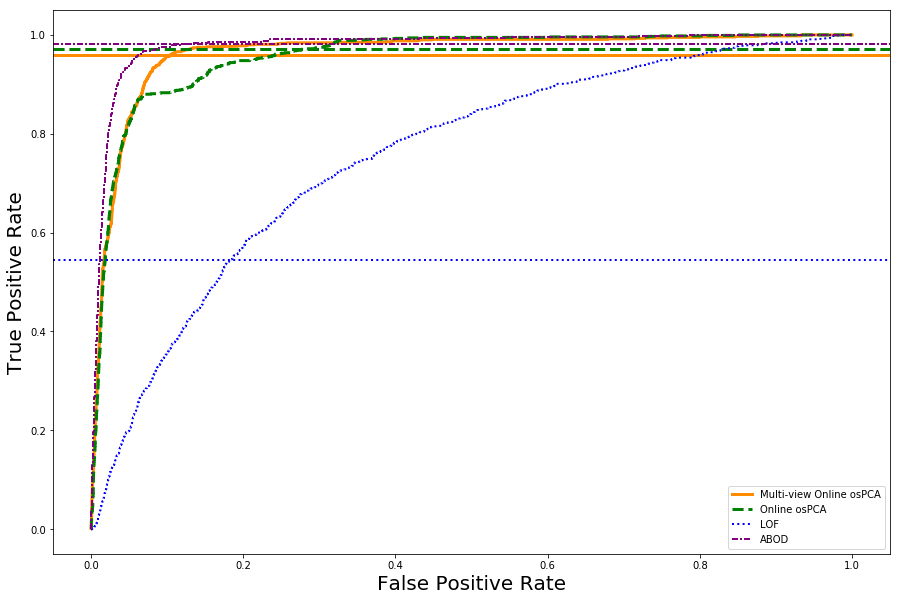

tpr:  0.968 , fpr:  0.2613220338983051
Auc whole:  0.9564904745762712
----------------------------------
[array([  0,  11,  12,  13,  16,  22,  23,  24,  25,  39,  46,  47,  52,
        53,  54,  55,  56,  57,  58,  59,  62,  67,  68,  69,  70,  80,
        81,  82,  83,  84,  88,  93,  95, 101, 102, 103, 104, 110, 112,
       113, 114, 115, 116, 117, 141, 146, 147, 155, 156, 157, 158, 159,
       160, 161, 162, 163]), array([  1,   2,   3,   4,   5,   8,  15,  17,  18,  19,  26,  27,  28,
        29,  30,  32,  33,  34,  35,  36,  37,  41,  48,  50,  51,  71,
        72,  73,  74,  86,  90,  92,  96,  98, 108, 109, 111, 120, 121,
       122, 126, 127, 128, 129, 133, 134, 136, 137, 138, 144, 152, 153,
       166, 167, 168]), array([6, 7]), array([ 94, 135, 139, 140]), array([  9,  10,  14,  20,  21,  31,  38,  40,  42,  43,  44,  45,  49,
        60,  61,  63,  64,  65,  66,  75,  76,  77,  78,  79,  85,  87,
        89,  91,  97,  99, 100, 105, 106, 107, 118, 119, 123, 124, 125,
     

  7%|▋         | 2133/30500 [00:00<00:01, 21326.61it/s]

[3.30812307e-03 1.41321270e-07 3.06277226e-11 1.37206294e-06
 3.47822617e-04]
Fine Clusters:  [0 4]
Not update


100%|██████████| 30500/30500 [00:01<00:00, 19180.52it/s]


tpr:  0.965 , fpr:  0.1275593220338983
Find intersection
[]
[71 72 73 74]
[]
[]
[75 76 77 78]
ComLen
[0. 4. 0. 0. 4.]
pick
[71 72 73 74]
------------------------
[  0  11  12  13  16  22  23  24  25  39  46  47  52  53  54  55  56  57
  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101 102 103
 104 110 112 113 114 115 116 117 141 146 147 155 156 157 158 159 160 161
 162 163]
[]
[]
[]
[ 38  40 118 131]
ComLen
[56.  0.  0.  0.  4.]
pick
[  0  11  12  13  16  22  23  24  25  39  46  47  52  53  54  55  56  57
  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101 102 103
 104 110 112 113 114 115 116 117 141 146 147 155 156 157 158 159 160 161
 162 163]
------------------------
[]
[ 27  29 111]
[]
[]
[]
ComLen
[0. 3. 0. 0. 0.]
pick
[ 27  29 111]
------------------------
[]
[33 34 35 36]
[]
[]
[]
ComLen
[0. 4. 0. 0. 0.]
pick
[33 34 35 36]
------------------------
[]
[  1   2   3   4   5  15  17  18  19  26  30  37  41  50  51  86  90  92
  96  98 108 109 120 121 122 1

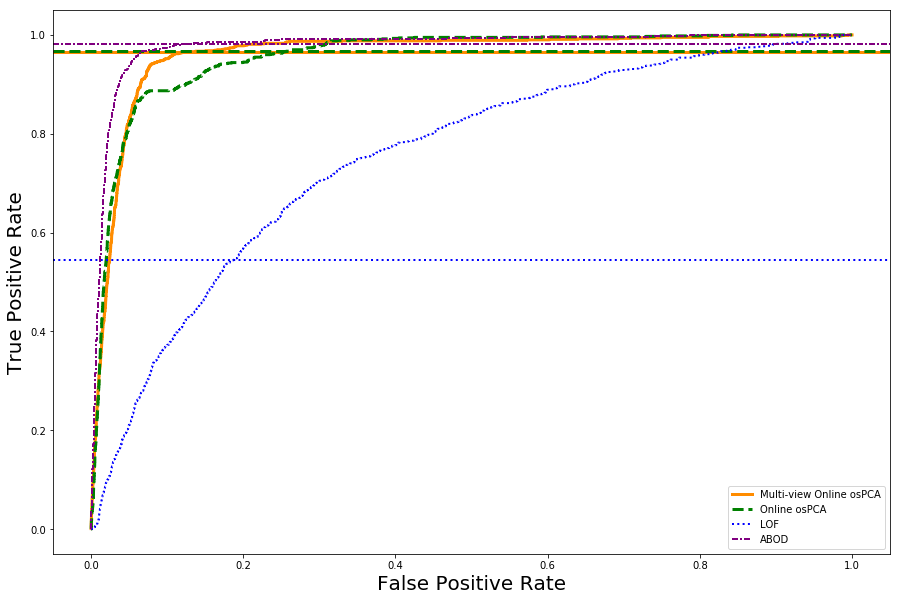

tpr:  0.971 , fpr:  0.3010847457627119
Auc whole:  0.9537113559322035
----------------------------------
[array([6, 7]), array([  8,   9,  14,  20,  21,  30,  31,  40,  42,  43,  45,  48,  49,
        60,  61,  63,  64,  65,  66,  74,  75,  76,  77,  78,  79,  85,
        87,  89,  91,  97,  98,  99, 100, 106, 107, 119, 123, 124, 125,
       130, 131, 132, 142, 143, 144, 145, 148, 149, 150, 151, 154, 165]), array([  1,   2,   3,   4,   5,  15,  17,  18,  19,  26,  27,  28,  29,
        32,  33,  34,  35,  36,  37,  41,  44,  50,  51,  71,  72,  73,
        86,  90,  92,  94,  96, 108, 109, 111, 120, 121, 122, 126, 127,
       128, 129, 133, 134, 135, 136, 137, 138, 152, 153, 166, 167, 168]), array([139, 140]), array([  0,  10,  11,  12,  13,  16,  22,  23,  24,  25,  38,  39,  46,
        47,  52,  53,  54,  55,  56,  57,  58,  59,  62,  67,  68,  69,
        70,  80,  81,  82,  83,  84,  88,  93,  95, 101, 102, 103, 104,
       105, 110, 112, 113, 114, 115, 116, 117, 118, 141, 146, 14

  8%|▊         | 2483/30500 [00:00<00:01, 24820.67it/s]

[3.29252181e-11 2.86986755e-06 3.72783915e-09 3.35431682e-12
 3.41435867e-03]
Fine Clusters:  [4]
Not update


100%|██████████| 30500/30500 [00:00<00:00, 33404.87it/s]


tpr:  0.959 , fpr:  0.08477966101694916
Find intersection
[]
[74]
[71 72 73]
[]
[]
ComLen
[0. 1. 3. 0. 0.]
pick
[71 72 73]
------------------------
[]
[]
[]
[]
[  0  11  12  13  16  22  23  24  25  39  46  47  52  53  54  55  56  57
  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101 102 103
 104 110 112 113 114 115 116 117 141 146 147 155 156 157 158 159 160 161
 162 163]
ComLen
[ 0.  0.  0.  0. 56.]
pick
[  0  11  12  13  16  22  23  24  25  39  46  47  52  53  54  55  56  57
  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101 102 103
 104 110 112 113 114 115 116 117 141 146 147 155 156 157 158 159 160 161
 162 163]
------------------------
[]
[]
[ 27  29 111]
[]
[]
ComLen
[0. 0. 3. 0. 0.]
pick
[ 27  29 111]
------------------------
[]
[]
[33 34 35 36]
[]
[]
ComLen
[0. 0. 4. 0. 0.]
pick
[33 34 35 36]
------------------------
[]
[ 30  98 144]
[  1   2   3   4   5  15  17  18  19  26  37  41  50  51  86  90  92  96
 108 109 120 121 122 126 127 128 129 133 134 

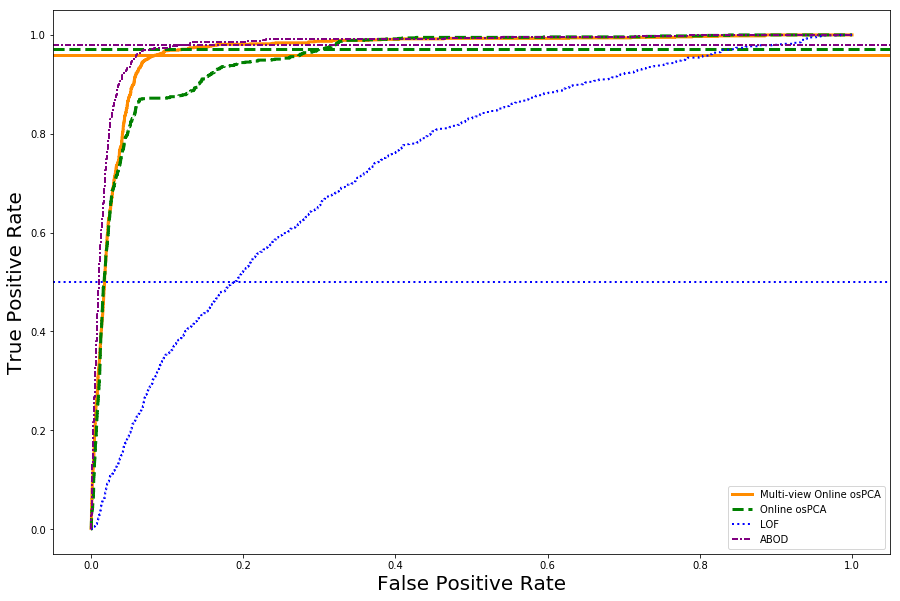

For whole dataset: 
Auc:  0.9554089898305085 +- 0.0014621891486065544
Tpr:  0.969 +- 0.002097617696340305
Fpr:  0.2789423728813559 +- 0.016757306115386124
For Laplacian: 
Average threshold: 
[0.00728376 0.00375174 0.00071793 0.00164936 0.00075545]
threshold in order: 
[0.00071793 0.00075545 0.00164936 0.00375174 0.00728376]
Auc:  0.961888901694915 +- 0.00431844218820639
Tpr:  0.9468 +- 0.026095210288480122
Fpr:  0.10617627118644066 +- 0.019180946688999462
Fine clusters: 
[array([0, 1]), array([0, 1, 2]), array([1, 3]), array([0, 4]), array([4])]
For Lof: 
Auc:  0.7506692440677966 +- 0.009142811235405189
Tpr:  0.5318 +- 0.023344378338263815
Fpr:  0.1863322033898305 +- 0.002374469202391434
For Abod: 
Auc:  0.9781660135593221 +- 0.0003270213583973274
Tpr:  0.9802 +- 0.0007483314773547889
Fpr:  0.12104406779661017 +- 0.002109705891487721
[71 72 73]
[  0  11  12  13  16  22  23  24  25  39  46  47  52  53  54  55  56  57
  58  59  62  67  68  69  70  80  81  82  83  84  88  93  95 101 102 1

In [67]:
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian_full(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           n_abod, contami_abod,
                           n_lof, contami_lof,
                           Name=pStr,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                           UPDATE=UPDATE, NOR_RAN=NOR_RAN)

In [68]:
# test quick functions
ospca.quickAucTprFpr(Name=pStr)

For whole dataset: 
Auc:  0.9554089898305087 +- 0.0014621891486065004
Tpr:  0.969 +- 0.0020976176963402623
Fpr:  0.2789423728813559 +- 0.016757306115386124
For Laplacian: 
Auc:  0.961888901694915 +- 0.004318442188206379
Tpr:  0.9468 +- 0.026095210288480133
Fpr:  0.10617627118644066 +- 0.019180946688999462
For Lof: 
Auc:  0.7506692440677966 +- 0.009142811235405189
Tpr:  0.5318 +- 0.023344378338263815
Fpr:  0.1863322033898305 +- 0.00237446920239144
For Abod: 
Auc:  0.9781660135593221 +- 0.0003270213583973954
Tpr:  0.9802 +- 0.0007483314773547532
Fpr:  0.12104406779661017 +- 0.002109705891487721


In [69]:
ospca.readCommonClus(Name=pStr)

[71. 72. 73.]
[  0.  11.  12.  13.  16.  22.  23.  24.  25.  39.  46.  47.  52.  53.
  54.  55.  56.  57.  58.  59.  62.  67.  68.  69.  70.  80.  81.  82.
  83.  84.  88.  93.  95. 101. 102. 103. 104. 110. 112. 113. 114. 115.
 116. 117. 141. 146. 147. 155. 156. 157. 158. 159. 160. 161. 162. 163.]
[ 27.  29. 111.]
[33. 34. 35. 36.]
[  1.   2.   3.   4.   5.  15.  17.  18.  19.  26.  37.  41.  50.  51.
  86.  90.  92.  96. 108. 109. 120. 121. 122. 126. 127. 128. 129. 133.
 134. 137. 138. 166. 167.]


[array([71., 72., 73.]),
 array([  0.,  11.,  12.,  13.,  16.,  22.,  23.,  24.,  25.,  39.,  46.,
         47.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  62.,  67.,
         68.,  69.,  70.,  80.,  81.,  82.,  83.,  84.,  88.,  93.,  95.,
        101., 102., 103., 104., 110., 112., 113., 114., 115., 116., 117.,
        141., 146., 147., 155., 156., 157., 158., 159., 160., 161., 162.,
        163.]),
 array([ 27.,  29., 111.]),
 array([33., 34., 35., 36.]),
 array([  1.,   2.,   3.,   4.,   5.,  15.,  17.,  18.,  19.,  26.,  37.,
         41.,  50.,  51.,  86.,  90.,  92.,  96., 108., 109., 120., 121.,
        122., 126., 127., 128., 129., 133., 134., 137., 138., 166., 167.])]

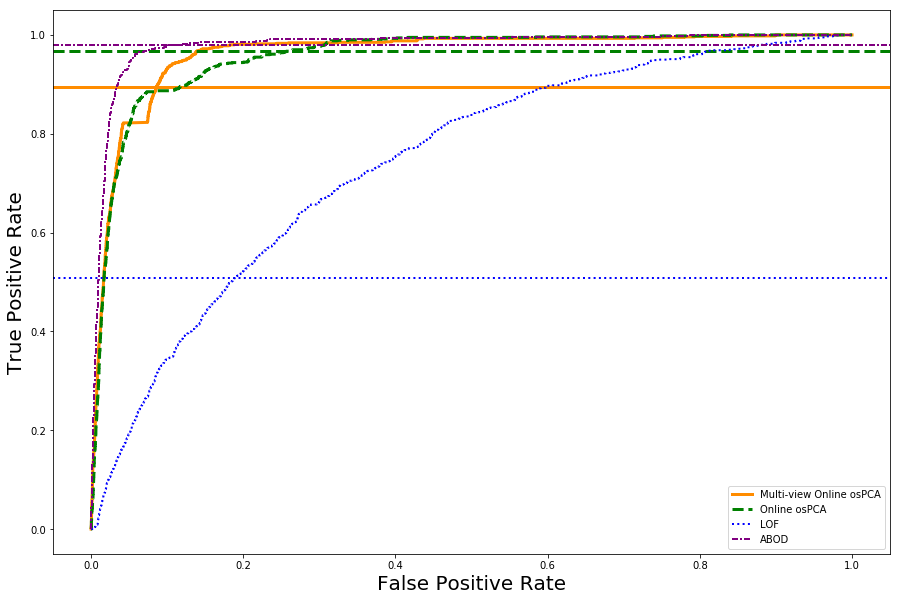

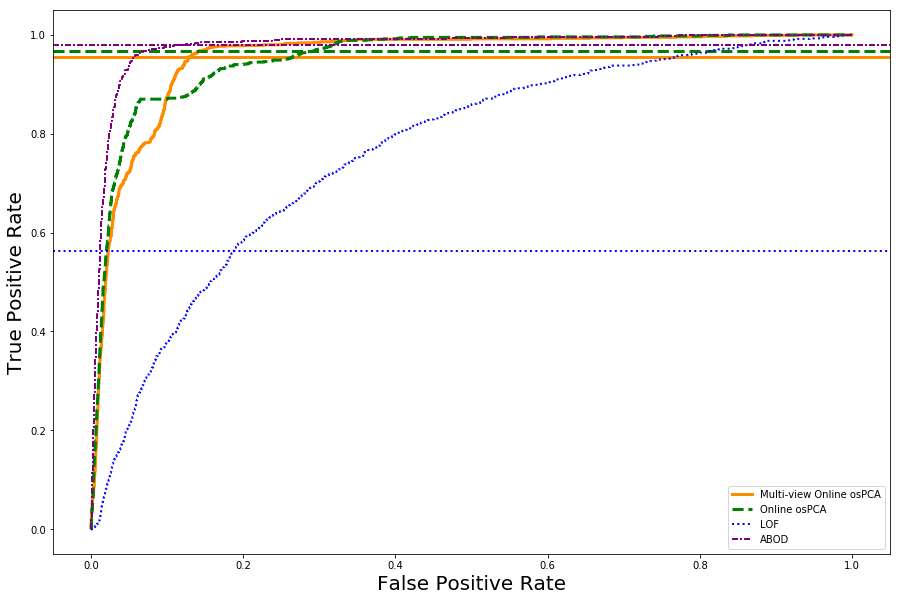

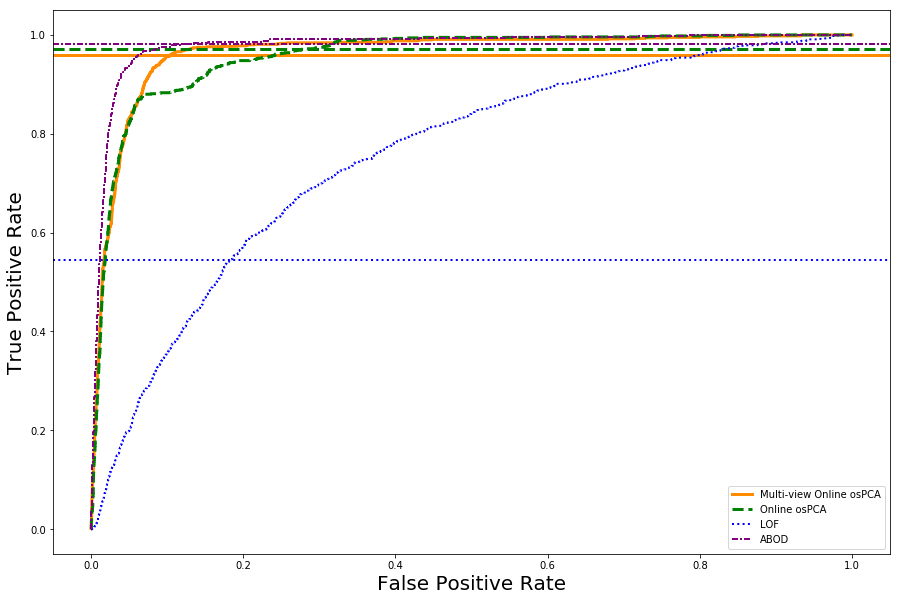

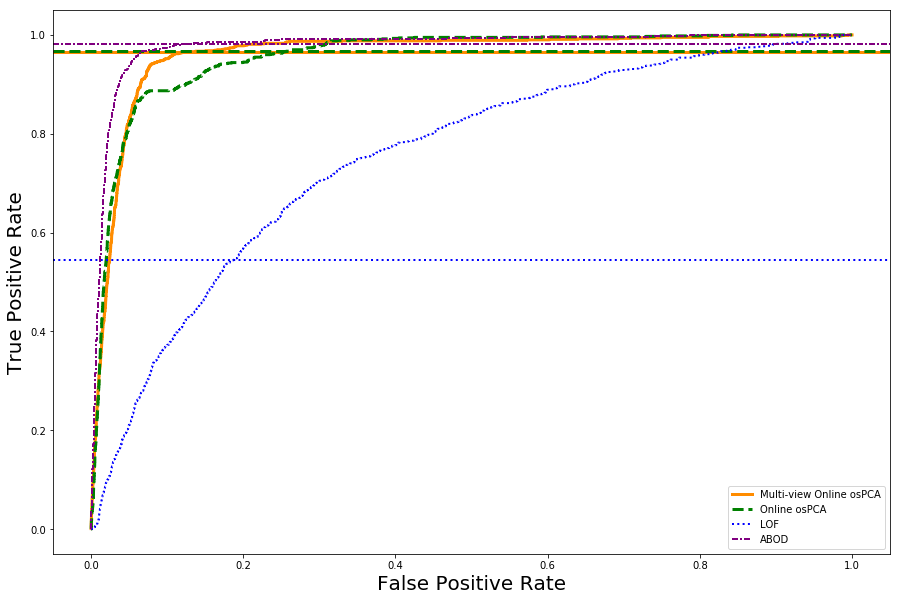

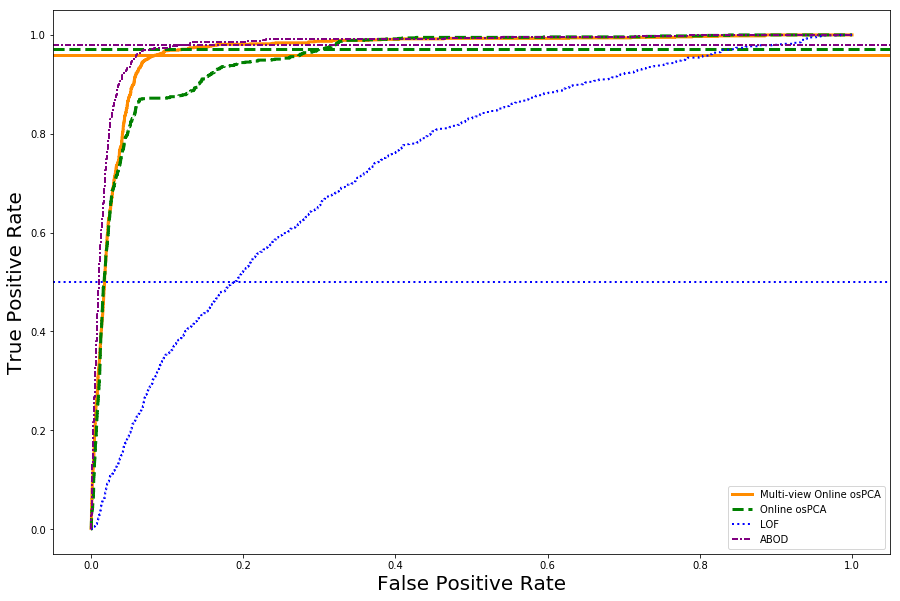

In [70]:
ospca.quick_ROC_plot(Name=pStr, NTRAIL=5)